In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import *
from scipy.sparse import *
import warnings
#warnings.filterwarnings("ignore")

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [4]:
from scipy import sparse
import pickle as pk
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from prettytable import PrettyTable
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [5]:
#loading BoW 
train_bow=sparse.load_npz("train_bow.npz")
#cv_bow=sparse.load_npz("cv_bow.npz")
test_bow=sparse.load_npz("test_bow.npz")
traincv_bow=sparse.load_npz("traincv_bow.npz")

In [6]:
#loading tf-idf data
train_tfidf=sparse.load_npz("train_tfidf.npz")
#cv_tfidf=sparse.load_npz("cv_fidf.npz")
traincv_tfidf=sparse.load_npz("traincv_tfidf.npz")
test_tfidf=sparse.load_npz("test_tfidf.npz")

In [7]:
#loading word2vec
with open('train_w2v.pkl', 'rb') as tr:
    train_w2v = pk.load(tr)
#with open('cv_w2v.pkl','rb') as cvl:
    #cv_w2v = pk.load(cvl)
with open('train_w2v.pkl','rb') as tcv:
     traincv_w2v=pk.load(tcv)
with open('test_w2v.pkl','rb') as tst:
    test_w2v=pk.load(tst)

In [8]:
#loading tfidf weighted w2v
with open('train_tfidf_w2v.pkl', 'rb') as t:
    train_tfidf_w2v = pk.load(t)
with open('cv_tfidf_w2v.pkl','rb') as c:
    cv_tfidf_w2v=pk.load(c)
with open('traincv_tfidf_w2v.pkl','rb') as tcv:
    traincv_tfidf_w2v=pk.load(tcv)
with open('test_tfidf_w2v.pkl','rb') as ts:
    test_tfidf_w2v=pk.load(ts)    


In [9]:
train=pd.read_csv('train')
cv=pd.read_csv('cv')
test=pd.read_csv('test')
traincv=pd.read_csv('traincv')
train_y=train['Score']
cv_y=cv['Score']
traincv_y=traincv['Score']
test_y=test['Score']

In [45]:
def Gsearch(X_train,y_train,X_test,y_test,vect):
    alphas = [0.00001,0.0001,0.001,0.01,1]
    clf = SGDClassifier(loss='hinge')
    param_grid = {'alpha':alphas}
    grid = GridSearchCV(estimator = clf,param_grid=param_grid ,cv = 3,n_jobs = 3)
    grid.fit(X_train, y_train)
    print("best alpha = ", grid.best_params_)
    print("Accuracy on train data = ", grid.best_score_*100)
    a = grid.best_params_
    optimal_a1 = a.get('alpha')
    #clf = SVC(C = optimal_c1,gamma = optimal_g1)
    clf = SGDClassifier(loss='hinge',alpha = optimal_a1) #class_weight = 'balanced')
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    pre1 = precision_score(y_test, pred) * 100
    rec1 = recall_score(y_test, pred) * 100
    f11 = f1_score(y_test, pred) * 100
    print('\nTest Data Results:')
    print('\nprecision=%f%%' % (pre1))
    print('\nrecall=%f%%' % (rec1))
    print('\nF1-Score=%f%%' % (f11))
    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm, annot=True,fmt='d')
    plt.title('Confusion Matrix for '+vect)
    plt.show()
    error = [(1-i)*100 for i in grid.cv_results_['mean_test_score']]
    plt.plot(alphas, error)
    plt.title('Error plot for'+vect)
    plt.xlabel('Alpha')
    plt.ylabel('Test_Error')
    plt.show()

best alpha =  {'alpha': 1e-05}
Accuracy on train data =  91.06428571428572

Test Data Results:

precision=92.618478%

recall=96.904738%

F1-Score=94.713139%


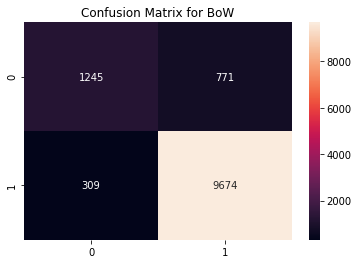

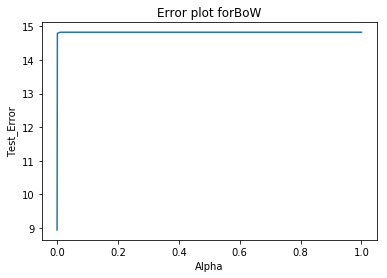

In [46]:
vect='BoW'
Gsearch(train_bow,train_y,test_bow,test_y,vect)
warnings.filterwarnings("ignore")

best alpha =  {'alpha': 1e-05}
Accuracy on train data =  91.09285714285714

precision=92.443638%

recall=96.934789%

F1-Score=94.635959%


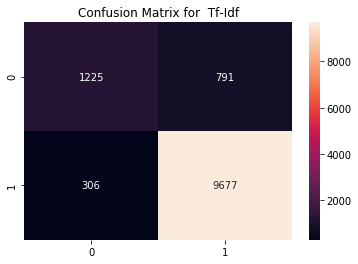

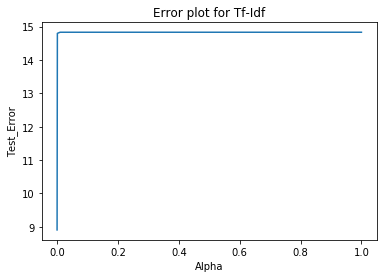

In [31]:
vect=' Tf-Idf'
Gsearch(train_tfidf,train_y,test_tfidf,test_y,vect)
warnings.filterwarnings("ignore")

best alpha =  {'alpha': 0.001}
Accuracy on train data =  87.72380952380952

precision=87.749416%

recall=97.796254%

F1-Score=92.500829%


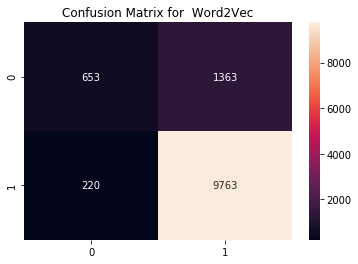

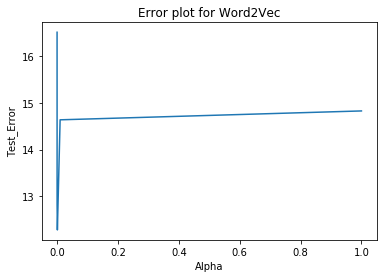

In [33]:
vect=' Word2Vec'
Gsearch(train_w2v,train_y,test_w2v,test_y,vect)
warnings.filterwarnings("ignore")

best alpha =  {'alpha': 0.0001}
Accuracy on train data =  86.70952380952382

Test Data Results:

precision=83.690764%

recall=96.944806%

F1-Score=89.831531%


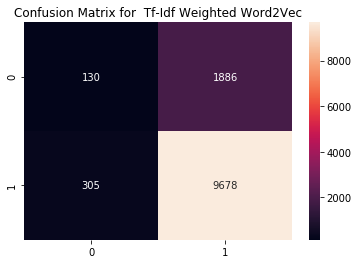

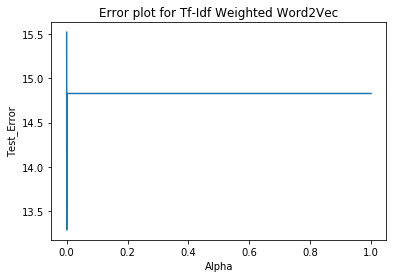

In [36]:
vect=' Tf-Idf Weighted Word2Vec'
Gsearch(train_tfidf_w2v,train_y,test_tfidf_w2v,test_y,vect)
warnings.filterwarnings("ignore")